# Extension Plan: Wildfire Impact on Employment in Tourism

In [1]:
#Imports

import pandas as pd

import csv

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import numpy as np

Reading historical and prediction smoke estimate data 

In [2]:
smoke_est=pd.read_csv('smoke est.csv')
predict=pd.read_csv('smoke prediction.csv')

Reading Leisure and Hospitality employment data for Lawton city in U.S. Bureau of Labor Statistics. This data contains number of employment in Leisure and Hospitality sector from 1990 to present. 

In [3]:
emp=pd.read_excel('SeriesReport-20231126210722_aba2d0.xlsx')
# data start in row 13, hence excluding first 12 rows
df_emp = emp[11:]

C:\Users\april\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
# formatting employment data frame
df_emp = df_emp.rename(columns=df_emp.iloc[0]).drop(df_emp.index[0])
df_emp = df_emp.reset_index(drop=True)
df_emp['Year'] = df_emp['Year'].astype(int)
df_emp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1990,3.6,3.6,3.5,3.4,3.5,3.5,3.7,3.7,3.6,3.6,3.5,3.4,3.6
1,1991,3.4,3.5,3.4,3.5,3.4,3.5,3.5,3.6,3.6,3.5,3.5,3.4,3.5
2,1992,3.3,3.4,3.4,3.7,3.6,3.6,3.7,3.7,3.7,3.8,3.8,3.8,3.6
3,1993,3.7,3.7,3.8,3.9,3.9,3.8,3.9,4.0,3.9,4.0,3.9,3.9,3.9
4,1994,3.7,3.8,3.9,3.8,3.9,4.0,3.9,4.0,3.9,3.9,3.8,3.7,3.9
5,1995,3.6,3.6,3.7,3.8,3.9,3.9,4.0,4.0,3.9,3.9,3.7,3.8,3.8
6,1996,3.7,3.7,3.8,3.8,3.9,3.9,3.9,3.9,3.9,3.8,3.8,3.7,3.8
7,1997,3.7,3.9,4.1,4.2,4.1,4.1,4.1,4.1,4.2,4.0,4.0,3.9,4.0
8,1998,3.7,3.6,3.7,3.9,3.9,3.9,3.9,4.0,4.0,3.9,4.0,4.0,3.9
9,1999,3.7,3.7,3.8,3.8,3.9,4.0,4.2,4.4,4.4,4.3,4.2,4.1,4.0


calculating average employment number during the fire season and annual average

In [5]:
df_emp['Fire Season'] = df_emp[['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']].mean(axis=1)
df_emp['Average'] = df_emp.iloc[:, 1:13].mean(axis=1, skipna=True)
df_emp = df_emp.drop(columns=['Annual'])
df_emp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Fire Season,Average
0,1990,3.6,3.6,3.5,3.4,3.5,3.5,3.7,3.7,3.6,3.6,3.5,3.4,3.600000,3.550000
1,1991,3.4,3.5,3.4,3.5,3.4,3.5,3.5,3.6,3.6,3.5,3.5,3.4,3.516667,3.483333
2,1992,3.3,3.4,3.4,3.7,3.6,3.6,3.7,3.7,3.7,3.8,3.8,3.8,3.683333,3.625000
3,1993,3.7,3.7,3.8,3.9,3.9,3.8,3.9,4.0,3.9,4.0,3.9,3.9,3.916667,3.866667
4,1994,3.7,3.8,3.9,3.8,3.9,4.0,3.9,4.0,3.9,3.9,3.8,3.7,3.933333,3.858333
5,1995,3.6,3.6,3.7,3.8,3.9,3.9,4.0,4.0,3.9,3.9,3.7,3.8,3.933333,3.816667
6,1996,3.7,3.7,3.8,3.8,3.9,3.9,3.9,3.9,3.9,3.8,3.8,3.7,3.883333,3.816667
7,1997,3.7,3.9,4.1,4.2,4.1,4.1,4.1,4.1,4.2,4.0,4.0,3.9,4.100000,4.033333
8,1998,3.7,3.6,3.7,3.9,3.9,3.9,3.9,4.0,4.0,3.9,4.0,4.0,3.933333,3.875000
9,1999,3.7,3.7,3.8,3.8,3.9,4.0,4.2,4.4,4.4,4.3,4.2,4.1,4.200000,4.041667


In [27]:
yearly_est_df = smoke_est.groupby('Fire_Year').mean().reset_index()

merged_df = pd.merge(df_emp, yearly_est_df, left_on='Year', right_on='Fire_Year', how='inner')


merged_df = merged_df[['Year','Fire Season','Average','scaled_smoke_est']]
merged_df

,Year,Fire Season,Average,scaled_smoke_est
0,1990,3.600000,3.550000,7.330645
1,1991,3.516667,3.483333,8.946312
2,1992,3.683333,3.625000,8.466879
3,1993,3.916667,3.866667,9.121769
4,1994,3.933333,3.858333,11.323926
5,1995,3.933333,3.816667,8.783318
6,1996,3.883333,3.816667,14.483558
7,1997,4.100000,4.033333,7.548321
8,1998,3.933333,3.875000,9.367262
9,1999,4.200000,4.041667,12.719342


Comparing the correlation between smoke estimate and average employment from fire season and annual

In [79]:
correlation1 = merged_df['scaled_smoke_est'].corr(merged_df['Fire Season'])
correlation2 = merged_df['scaled_smoke_est'].corr(merged_df['Average'])
print(correlation1, correlation2)

0.5278621559126595 0.5180921927638981


Employment during fire season have higher correlation with smoke estimate. Therefore, this analysis will use employment during fire season as the employment measurement.

Excluding 2020 data due to the pandemic impact 

In [28]:
final_df = merged_df[merged_df['Year'] != 2020]
final_df

,Year,Fire Season,Average,scaled_smoke_est
0,1990,3.600000,3.550000,7.330645
1,1991,3.516667,3.483333,8.946312
2,1992,3.683333,3.625000,8.466879
3,1993,3.916667,3.866667,9.121769
4,1994,3.933333,3.858333,11.323926
5,1995,3.933333,3.816667,8.783318
6,1996,3.883333,3.816667,14.483558
7,1997,4.100000,4.033333,7.548321
8,1998,3.933333,3.875000,9.367262
9,1999,4.200000,4.041667,12.719342


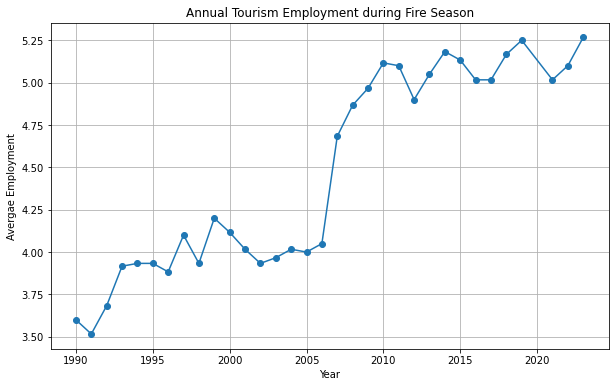

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(final_df['Year'], final_df['Fire Season'], marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Avergae Employment')
plt.title('Annual Tourism Employment during Fire Season')
plt.grid(True)
plt.show()

## Predictive Modeling

In [29]:
#Deploy the first model with smoke est as independent variable
X = final_df[['scaled_smoke_est']]
y = final_df['Fire Season'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.15081060723694348
R-squared: 0.28293448663066834


In [64]:
#Deploy second model with Year as independent variable
X = final_df[['Year']]
y = final_df['Fire Season'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.04653777236390417
R-squared: 0.7787249037545592


In [18]:
#Deploy third model with both smoke est and year as independent variable
X = final_df[['scaled_smoke_est','Year']]
y = final_df['Fire Season'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 0.0452576497579345
R-squared: 0.7848115563477892


After comparing the Mean Squared Error and R-Squared value of all three models, the model with  both smoke est and year as independent variable has the best performance. 

In [19]:
model = LinearRegression()
model.fit(X, y)

future_years = predict.copy()
# Make predictions for future years
future_predictions = model.predict(future_years[['Smoke_est', 'Year']])

prediction_df = pd.DataFrame({'Year': range(2024, 2050), 'Employment': future_predictions})
prediction_df

C:\Users\april\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Smoke_est
Feature names seen at fit time, yet now missing:
- scaled_smoke_est

  warnings.warn(message, FutureWarning)


,Year,Employment
0,2024,5.591465
1,2025,5.652000
2,2026,5.712534
3,2027,5.773068
4,2028,5.833602
5,2029,5.894136
6,2030,5.954670
7,2031,6.015204
8,2032,6.075738
9,2033,6.136272


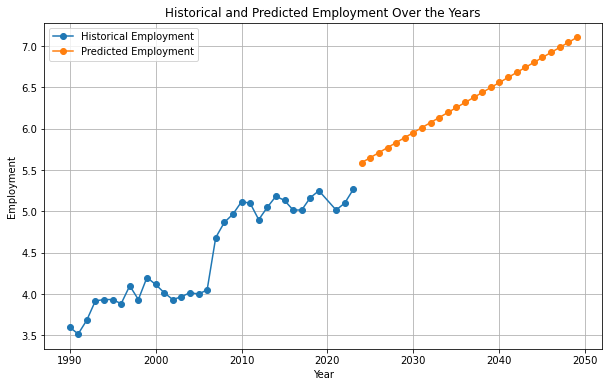

In [26]:
# Plotting
plt.figure(figsize=(10, 6))

plt.plot(final_df['Year'], final_df['Fire Season'], marker='o', linestyle='-', label='Historical Employment')

plt.plot(prediction_df['Year'], prediction_df['Employment'], marker='o', linestyle='-', label='Predicted Employment')


plt.xlabel('Year')
plt.ylabel('Employment')
plt.title('Historical and Predicted Employment Over the Years')
plt.legend()
plt.grid(True)
plt.show()